In [1]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
import numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# load training set and testing set
X_train, y_train = load_svmlight_file("/Users/taozizhuo/机器学习/a9a_train", n_features=123)
X_val, y_val = load_svmlight_file("/Users/taozizhuo/机器学习/a9a.t", n_features=123)

In [3]:
# preprocess
X_train = X_train.toarray()
X_val = X_val.toarray()
n_samples_train, n_features_train = X_train.shape
n_samples_val, n_features_val = X_val.shape
y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))

In [4]:
# initialize parameters
max_epoch = 200
learning_rate = 0.005
batch_size = 100
C = 0.5

# initialize w with random numbers
w = numpy.random.random((n_features_train, 1))
# initialize b
b = 0

In [5]:
# extract a random batch
random_index = numpy.random.choice(n_samples_train, batch_size, replace=False)
X_train_batch = X_train[random_index, :]
y_train_batch = y_train[random_index, :]

In [6]:
losses_train = []
losses_val = []

In [7]:
# Linear Classification and Batch Stochastic Gradient Descent
for epoch in range(max_epoch):
    h = 1 - y_train_batch * (numpy.dot(X_train_batch, w) + b)
    y_hat = numpy.where(h > 0, y_train_batch, 0)
    G_w = w - C * (numpy.dot(X_train_batch.transpose(), y_hat)) # calculate the gradient of w
    G_b = -C * numpy.sum(y_hat) # calculate the gradient of b
    w -= learning_rate * G_w # update w
    b -= learning_rate * G_b # update b

    y_predict_train = numpy.where(numpy.dot(X_train_batch, w) + b > 0, 1, -1) # set a threshold of 0
    # loss function on training set
    loss_train = (0.5*numpy.sum(w * w) +
                  C * numpy.sum(numpy.maximum(1 - y_train_batch * (numpy.dot(X_train_batch, w) + b), 0))) / batch_size
    losses_train.append(loss_train)

    y_predict_val = numpy.where(numpy.dot(X_val, w) + b > 0, 1, -1)
    # loss function on validation set
    loss_val = (0.5*numpy.sum(w * w) +
                C * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w) + b, 0))) / y_val.size
    losses_val.append(loss_val)

print(loss_val)

0.12385012035562983


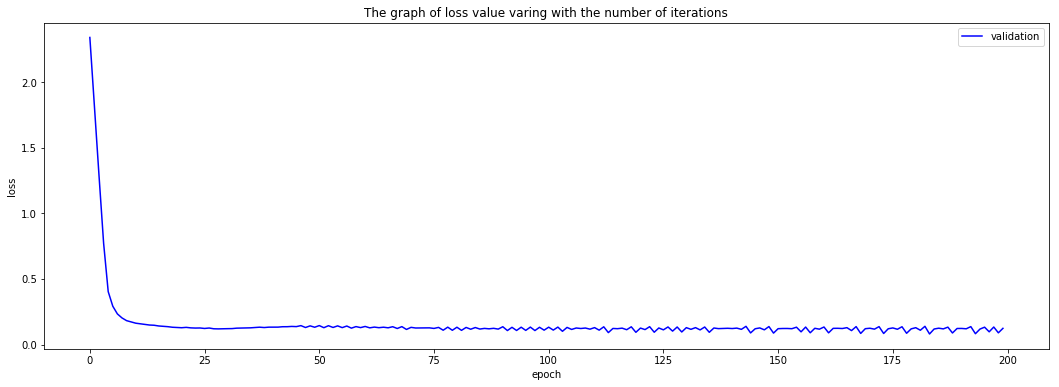

In [8]:
# show in graph
plt.figure(figsize=(18, 6))
# plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")
plt.show()